161.14744098666284
[1.12448062 0.91041527 0.99966094 1.15328858 1.11628536]
161.14744098666284
[0.88120509 0.82065491 0.80356347 0.94652516 0.98670237]
158.12380732851142
[0.68394279 0.37496238 0.87307737 0.45921066 0.38727029]
153.76307871034803
[ 0.29262455 -1.1262011  -0.65175956  0.79965998 -1.02999698]
97.33554134334518
[ 0.31711891 -1.32339615 -1.03493529  0.81849998 -1.15050908]
90.96586356410825
[ 0.65747717 -0.38951319 -0.34638485  1.14562133 -0.23047521]
90.96586356410825
[ 0.59864243 -0.56650468 -0.34455142  0.91485553 -0.42941533]
90.96586356410825
[ 0.44567209 -1.02668257 -0.3397845   0.31486446 -0.94665966]
90.96586356410825
[ 0.40095769 -1.16119611 -0.33839109  0.13948245 -1.09785416]
90.96586356410825
[ 0.49650531 -0.87376192 -0.34136858  0.51424611 -0.77477539]
90.96586356410825
[ 0.58960541 -0.59369058 -0.3442698   0.87940991 -0.45997254]
90.96586356410825
[ 0.56902737 -0.65559512 -0.34362854  0.79869726 -0.52955384]
90.96586356410825
[ 0.48220047 -0.91679493 -0.34092

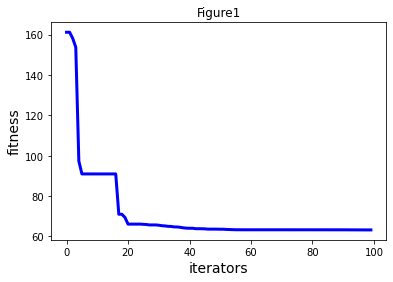

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

class PSO():
    def __init__(self, pN, dim, max_iter):
        #定义所需变量
        self.w = 0.8
        self.c1 = 2#学习因子
        self.c2 = 2

        self.r1 = 0.6#超参数
        self.r2 = 0.3

        self.pN = pN  # 粒子数量
        self.dim = dim  # 搜索维度
        self.max_iter = max_iter  # 迭代次数

        #定义各个矩阵大小
        self.X = np.zeros((self.pN, self.dim))  # 所有粒子的位置和速度矩阵
        self.V = np.zeros((self.pN, self.dim))
        self.pbest = np.zeros((self.pN, self.dim))  # 个体经历的最佳位置和全局最佳位置矩阵
        self.gbest = np.zeros((1, self.dim))
        self.p_fit = np.zeros(self.pN)  # 每个个体的历史最佳适应值
        self.fit = 1e10  # 全局最佳适应值

        self.init_Population()

    #目标函数，根据使用场景进行设置
    def function(self, x):
        sum = 0
        length = len(x)
        for i in range(length):
            sum += (4*x[i]**3-5*x[i]**2+x[i]+6)**2
        return sum

    #初始化粒子群
    def init_Population(self):
        for i in range(self.pN):
            for j in range(self.dim):
                self.X[i][j] = random.uniform(0, 1)
                self.V[i][j] = random.uniform(0, 1)
            self.pbest[i] = self.X[i]
            tmp = self.function(self.X[i])
            self.p_fit[i] = tmp
            if (tmp < self.fit):
                self.fit = tmp
                self.gbest = self.X[i]

    def iterator(self):
        fitness = []
        for t in range(self.max_iter):
            for i in range(self.pN):  # 更新gbest\pbest
                temp = self.function(self.X[i])
                if (temp < self.p_fit[i]):  # 更新个体最优
                    self.p_fit[i] = temp
                    self.pbest[i] = self.X[i]
                    if (self.p_fit[i] < self.fit):  # 更新全局最优
                        self.gbest = self.X[i]
                        self.fit = self.p_fit[i]
            for i in range(self.pN):
                #粒子群算法公式
                self.V[i] = self.w * self.V[i] + self.c1 * self.r1 * (self.pbest[i] - self.X[i]) + \
                            self.c2 * self.r2 * (self.gbest - self.X[i])
                self.X[i] = self.X[i] + self.V[i]
            fitness.append(self.fit)
            print(self.fit)  # 输出最优值
            print(self.gbest)
        return fitness

if __name__ == '__main__':
    my_pso = PSO(pN=30, dim=5, max_iter=100)
    fitness = my_pso.iterator()
    plt.figure(1)
    plt.title("Figure1")
    plt.xlabel("iterators", size=14)
    plt.ylabel("fitness", size=14)
    t = np.array([t for t in range(0, 100)])
    fitness = np.array(fitness)
    plt.plot(t, fitness, color='b', linewidth=3)
    plt.show()